<a href="https://colab.research.google.com/github/acodeforone/22projects/blob/main/01_Iris_Classification_KNN_00_01_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification — KNN
## 1. Mission
Predict one of three iris species — Setosa, Versicolor, Virginica — using 4 numeric features:
*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

## 2. Mental Picture
3 clusters in space.
Petal length & width separate them clearly:
*   Setosa → short/narrow petals.
*   Virginica → longest/widest petals.
*   Versicolor → in between.



## 3. Import libs

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
import pandas as pd

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

# Display the first 5 rows
display(df.head())

# Display basic info about the dataset
display(df.info())

# Display descriptive statistics
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 4. Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Choose Model
Quick picks:
*   Baseline → LogisticRegression(max_iter=200)
*   Easy accuracy → KNeighborsClassifier(n_neighbors=3)
*   Easy to explain → DecisionTreeClassifier(max_depth=3)

### 3.1 Use simple KNN (No standard scaler)

In [10]:
model = KNeighborsClassifier(n_neighbors=3)

## 6. Train

In [11]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 7. Test (Prediction)

In [12]:
y_pred = model.predict(X_test)

## 8. Evaluate

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 9. Visualize the Data

In [14]:
import matplotlib.pyplot as plt

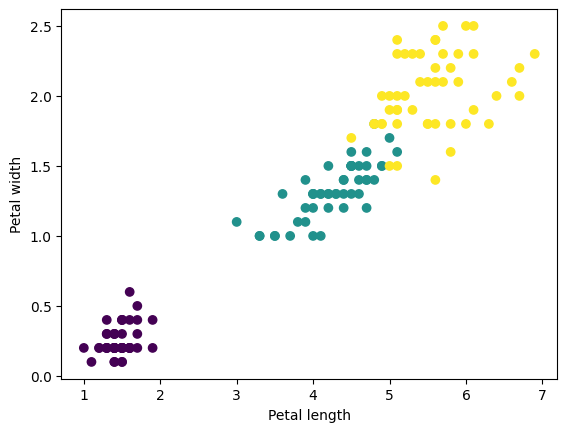

In [15]:
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

### 3.2 KNN with Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



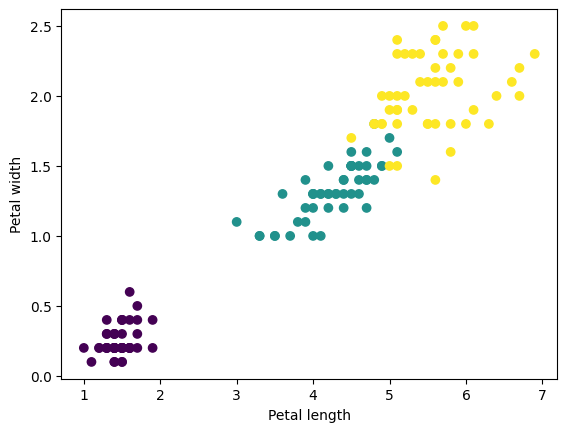

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

### 3.3 KNN with Standard Scaler and Cross Validation Score

In [21]:
from sklearn.model_selection import cross_val_scoreAI/ML Projects/Studies

In [22]:
scores = cross_val_score(model, X, y, cv=5)
print(scores, scores.mean())

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ] 0.9666666666666668


In [23]:
for k in [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"k={k}, mean accuracy={scores.mean():.3f}")

k=1, mean accuracy=0.960
k=3, mean accuracy=0.967
k=5, mean accuracy=0.973
k=7, mean accuracy=0.980


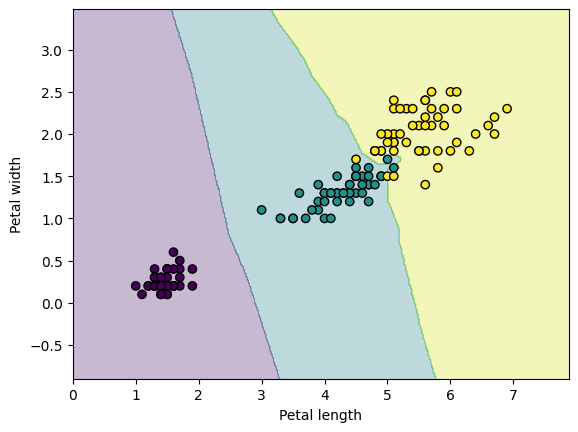

In [24]:
import matplotlib.pyplot as plt
import numpy as np

X_plot = X[:, 2:4]  # petal length & width
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_plot, y)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()
